In [1]:
#%run ANN_Regression_Finial.ipynb
from ANN_Regression_Finial import *
import pandas as pd
import numpy as np
import math
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./indicator_per capita government expenditure on health at average exchange rate.csv')
df.head()


,Per capita government expenditure on health at average exchange rate (US$),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820707,143.160577,138.840923


In [3]:
df.rename(columns={'Per capita government expenditure on health at average exchange rate (US$)': 'Country'}, inplace = True)
df.head()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820707,143.160577,138.840923


In [4]:
df.set_index('Country',inplace = True)
df.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820707,143.160577,138.840923


In [5]:
df.dropna(axis='rows', how='all',inplace = True)

In [6]:
df.fillna(0,inplace = True)

In [7]:
df.reset_index(inplace = True)

In [8]:
df

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
1,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
2,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820707,143.160577,138.840923
3,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
4,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
5,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700
6,Argentina,367.664357,357.212591,373.373275,382.569181,399.605605,381.877315,367.271410,120.725383,148.074723,173.801947,217.021027,258.846316,333.859695,437.003293,487.749052,405.058875
7,Armenia,7.968784,8.161282,7.357385,10.010791,9.628055,7.068904,10.996692,10.568109,13.909766,16.276034,23.630190,32.993022,48.331479,63.538595,55.954223,54.238760
8,Australia,1029.372657,1148.635677,1178.039092,1053.227780,1193.335611,1144.752844,1081.669023,1235.744552,1535.714845,1915.153068,2097.856608,2217.438755,2670.987968,2875.460883,2682.596575,3246.365812
9,Austria,2112.067683,2051.069613,1929.511347,2018.319654,2049.536567,1823.838758,1815.096639,1953.658872,2412.845413,2787.684689,2917.158741,3040.373513,3517.034374,3976.358149,3909.672128,3843.423895


In [9]:
df2=pd.melt(df,id_vars=['Country'],var_name='year')
df2.head()

,Country,year,value
0,Afghanistan,1995,0.000000
1,Albania,1995,13.940591
2,Algeria,1995,46.771460
3,Andorra,1995,897.181541
4,Angola,1995,13.516833


In [10]:
df3 = pd.get_dummies(df2)
df3.head()

,value,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010
0,0.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.940591,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.771460,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,897.181541,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.516833,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Train = int(df3.shape[0] * 0.6)
Validate = int(df3.shape[0] * 0.2)
Test = int(df3.shape[0] - Train - Validate)

Train_Model =  df3[:Train:]
Validate_Model = df3[Train:Validate + Train:]
Test_Model = df3[Validate + Train::]

In [12]:
y1 = Train_Model['value']
x1 = Train_Model.drop(['value'],axis = 1)

y1 = np.array(y1)
x1 = np.array(x1)

y2 = Validate_Model['value']
x2 = Validate_Model.drop(['value'],axis = 1)

y2 = np.array(y2)
x2 = np.array(x2)

y3 = Test_Model['value']
x3 = Test_Model.drop(['value'],axis = 1)

y3 = np.array(y3)
x3 = np.array(x3)

In [13]:
#temp = ANN_Regression(x1,y1,[50,50],Fs = [sigmoid,tanh],eta = 1e-2, epochs=1000)

In [21]:
temp2 = ANN_Regression(x1,y1,[50,50],Fs = [sigmoid,tanh],eta = 1e-1, epochs=1000)


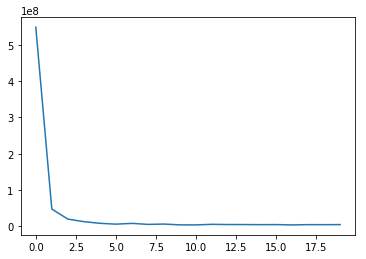

In [22]:
temp2.Fit(show_curve = True)

In [23]:
temp2.R2()

0.9935249541315224

In [24]:
temp2.predict(x2)

In [19]:
temp2.R2_P(y2)

0.8226316949596884

In [20]:
temp2.predict(x3)
temp2.R2_P(y3)

0.7223255332789265

In [26]:
df3.shape

(3072, 209)

In [53]:
best = []
for i in range (20):
    for j in range (20):
        temp = ANN_Regression(x1,y1,[50,50],Fs = [sigmoid,tanh],eta = 1e-1, epochs=1000)
        temp.Fit(lambda2 = i, lambda1 = j)
        temp.predict(x2)
        best.append((temp.R2_P(y2),i,j))

In [57]:
max(best)

(0.8149648392596098, 0, 0)

0.9457571338114588

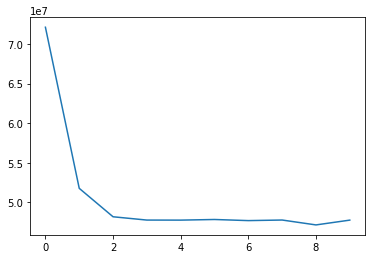

In [44]:
temp = ANN_Regression(x1,y1,[100],Fs = [ReLU],eta = 1e-2, epochs=500)
temp.Fit(lambda2 = 500, lambda1 = 100,show_curve = True)
temp.R2()

In [48]:
temp.predict(x2)
temp.R2_P(y2)

0.716480976360089

In [16]:
best = []
for i in range (20):
    for j in range (20):
        temp = ANN_Regression(x1,y1,[50,50],Fs = [sigmoid,tanh],eta = 1e-1, epochs=1000)
        temp.Fit(lambda2 = i, lambda1 = j)
        temp.predict(x2)
        best.append((temp.R2_P(y2),i,j))

In [17]:
max(best)

(0.8061594524550701, 0, 0)

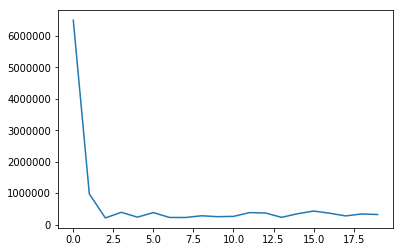

In [208]:
temp = ANN_Regression(x1,y1,[500],Fs = [ReLU],eta = 1e-2, epochs=1000)
temp.Fit(show_curve = True,lambda2 = 2, lambda1 = 0)
temp.predict(x2)

In [209]:
temp.R2_P(y2)

0.7802735963762276

In [228]:
best = []
for i in range (0,100,10):
    for j in range (0,100,10):
        temp = ANN_Regression(x1,y1,[50,50],Fs = [sigmoid,tanh],eta = 1e-1, epochs=1000)
        temp.Fit(lambda2 = i, lambda1 = j)
        temp.predict(x2)
        best.append((temp.R2_P(y2),i,j))

In [229]:
max(best)

(0.829697016194732, 0, 0)

In [24]:
 sum(np.sum(W*W) for W in temp.Ws)

139078.89590061232